## Dimensionality reduction

We will test some of the dimensionality reduction techniques on the [UFO dataset](https://drive.google.com/file/d/0B2gZvn36c5CmRTJpS3pkUllmX1U/view?usp=sharing) from the last week.




### PCA

Subset all **weather related** features from the data and run PCA over it. 


1. Extract the 2 best principal components (k=2). 
1. Plot the **feature** space into the new space. 
    - We should create a scatter plot with 1st component on the axis x and second component on y. 
    - The length of each component is equal to number of columns (features) we have in our data before PCA.
    - Points in the graph that are close to each other are similar features. We need to anotate the points with feature names.
1. Observe which features have similar meaning and which have opposite.
    - Features close to each other have similar meaning.
1. Select the optimal number of dimensions to keep - *k* (find the explained variance of each component and use the elbow rule)
1. Create a projection of your data into the *k* axes of the trained PCA
1. Export the data with the new features. Number of rows should be the same as in the original dataset.

In [158]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot
import plotly.graph_objs as go
import matplotlib.cm as cm

In [4]:
with open(r'C:\Users\user\Jupyter_py\lighthouse-python-fundamentals\Databoot camp\Week3\data_preparation_exercise\UFO_data.csv',) as f:
    ufo=pd.read_csv(f,sep=';',low_memory=False, index_col=0)

In [7]:
col=ufo.columns.to_list()

In [122]:
colors = {'Iris-setosa': '#0D76BF', 
          'Iris-versicolor': '#00cc96', 
          'Iris-virginica': '#EF553B'}
colors.values()

dict_values(['#0D76BF', '#00cc96', '#EF553B'])

In [120]:
ufo.head()

,timestamp,city,state,country,shape,duration_seconds,duration_text,notes,date_reported,lat,...,windBearing,windBearingError,windSpeed,windSpeedError,ast_absolute_magnitude_h,ast_estimated_diameter,ast_is_dangerous,ast_miss_distance,ast_orbiting_body,ast_relative_velocity
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27 00:00:00,29.883056,...,154.0,NaN,4.89,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16 00:00:00,29.384210,...,135.0,NaN,6.60,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21 00:00:00,53.200000,...,NaN,NaN,NaN,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17 00:00:00,28.978333,...,136.0,NaN,2.75,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22 00:00:00,21.418056,...,80.0,NaN,3.60,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043


In [125]:
ufo.ast_is_dangerous.value_counts()

False    73975
True      5906
Name: ast_is_dangerous, dtype: int64

In [123]:
col=ufo.columns.to_list()

In [35]:
weather=ufo[col]

In [128]:
@interact
def describe(column=col):
    print(ufo[column].describe(),ufo[column].head())

interactive(children=(Dropdown(description='column', options=('timestamp', 'city', 'state', 'country', 'shape'…

In [127]:
@interact
def describe(column=col):
    print(ufo[column].head())

interactive(children=(Dropdown(description='column', options=('timestamp', 'city', 'state', 'country', 'shape'…

In [31]:
# cool=[i for i in weather.columns.to_list() if 'Error' not in i]
# weather=weather[cool]
weather.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,visibility,windBearing,windSpeed
0,25.86,0.00,20.56,0.73,clear-night,0.0,0.0,NaN,1009.05,Clear,25.86,-638227800.0,16.09,154.0,4.89
1,26.12,0.00,21.72,0.77,clear-night,0.0,0.0,NaN,1008.81,Clear,26.12,-638226000.0,16.09,135.0,6.60
2,15.56,0.75,12.86,0.84,fog,NaN,NaN,rain,1019.00,Foggy,15.56,-448959600.0,2.90,NaN,NaN
3,22.68,0.12,17.04,0.71,clear-night,NaN,NaN,rain,1020.64,Clear,22.68,-417304800.0,16.09,136.0,2.75
4,25.74,0.63,21.47,0.77,partly-cloudy-night,NaN,NaN,rain,1015.33,Mostly Cloudy,25.74,-291060000.0,16.09,80.0,3.60


In [45]:
total=weather.isnull().sum().sort_values(ascending=False)
percent = (weather.isnull().sum()/weather.isnull().count()).sort_values(ascending=False)
# df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)
# weather.isnull().sum()
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
pressureError,80303,0.999639
cloudCoverError,80302,0.999627
visibilityError,80302,0.999627
dewPointError,80297,0.999564
humidityError,80297,0.999564
windSpeedError,80296,0.999552
windBearingError,80296,0.999552
temperatureError,80296,0.999552
precipType,66599,0.829047
precipIntensity,24498,0.304959


In [47]:
col_new=missing_data[missing_data.Percent< 0.8].index.to_list()

In [52]:
weather=weather[col_new]
weather=weather.dropna()
weather=weather.drop(columns=['summary','icon','time'],)
weather.head()

,precipIntensity,precipProbability,pressure,cloudCover,windBearing,windSpeed,visibility,humidity,dewPoint,temperature,apparentTemperature
0,0.0,0.0,1009.05,0.00,154.0,4.89,16.09,0.73,20.56,25.86,25.86
1,0.0,0.0,1008.81,0.00,135.0,6.60,16.09,0.77,21.72,26.12,26.12
10,0.0,0.0,1014.10,1.00,300.0,2.24,6.44,0.68,13.91,20.00,20.00
11,0.0,0.0,1021.43,0.96,345.0,1.40,11.80,0.83,14.55,17.42,17.42
12,0.0,0.0,1024.59,0.52,132.0,2.67,11.09,0.64,13.37,20.37,20.37


In [58]:
weather.isnull().sum()
weather.info()

precipIntensity        0
precipProbability      0
pressure               0
cloudCover             0
windBearing            0
windSpeed              0
visibility             0
humidity               0
dewPoint               0
temperature            0
apparentTemperature    0
dtype: int64

In [62]:
X = StandardScaler().fit_transform(weather) # scaling
weather_std = pd.DataFrame(X, columns = weather.columns)
weather_std.head()

,precipIntensity,precipProbability,pressure,cloudCover,windBearing,windSpeed,visibility,humidity,dewPoint,temperature,apparentTemperature
0,-0.106411,-0.238028,-1.153895,-0.866673,-0.405290,1.151352,0.512129,0.399423,1.457507,1.230152,1.151412
1,-0.106411,-0.238028,-1.188933,-0.866673,-0.596485,2.148531,0.512129,0.599742,1.575111,1.256200,1.174236
2,-0.106411,-0.238028,-0.416626,2.213403,1.063888,-0.393983,-3.503053,0.149025,0.783311,0.643086,0.636977
3,-0.106411,-0.238028,0.653509,2.090200,1.516717,-0.883825,-1.272859,0.900219,0.848196,0.384616,0.410485
4,-0.106411,-0.238028,1.114849,0.734967,-0.626673,-0.143230,-1.568276,-0.051293,0.728564,0.680153,0.669458


In [106]:
cov_mat = np.cov(X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals

array([2.99420587, 2.28141482, 1.44461308, 1.09745791, 0.92806086,
       0.40170142, 0.01416684, 0.00480718, 0.6720404 , 0.56659871,
       0.5951327 ])

In [105]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort()
eig_pairs.reverse()
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9942058667011127
2.281414819676119
1.4446130764791274
1.0974579112883103
0.9280608586474011
0.6720404013155106
0.5951327028260346
0.5665987131574662
0.40170141751534943
0.014166843084096421
0.004807178622560757


In [119]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
trace1 = go.Bar(
    x=[f'PC {i}' for i in range(1,12)],
    y=var_exp,
    name='Individual'
)

trace2 = go.Scatter(
    x=['PC %s' %i for i in range(1,12)], 
    y=cum_var_exp,
    mode='lines+markers',
    name='Cumulative')

data = [trace1,trace2]

layout = go.Layout(
    title = 'Line chart showing three different modes'
)


fig= go.Figure(data=data,layout=layout)
fig.show()
# iplot(fig, filename='selecting-principal-components')

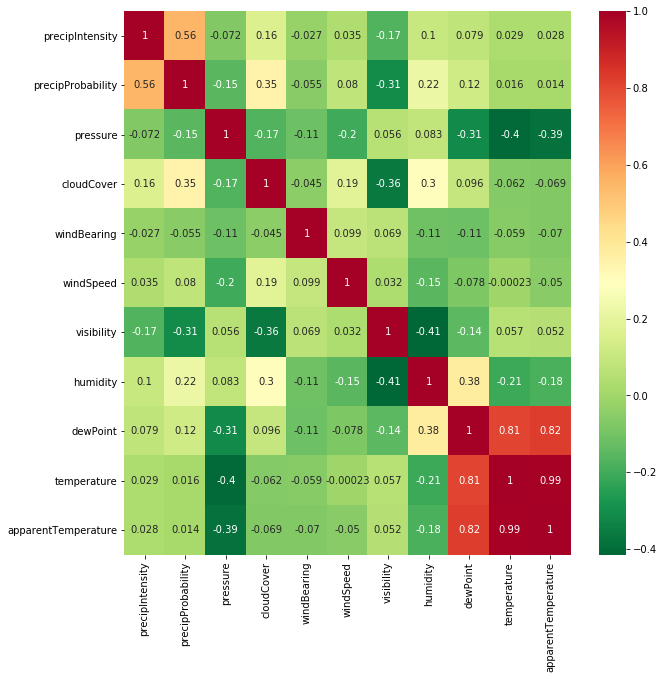

In [77]:
corrmat = weather_std.corr()
# top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
# sns.heatmap(corrmat[abs(corrmat['windBearing'])>0.09],annot=True,cmap="RdYlGn_r")
sns.heatmap(corrmat,annot=True,cmap="RdYlGn_r");

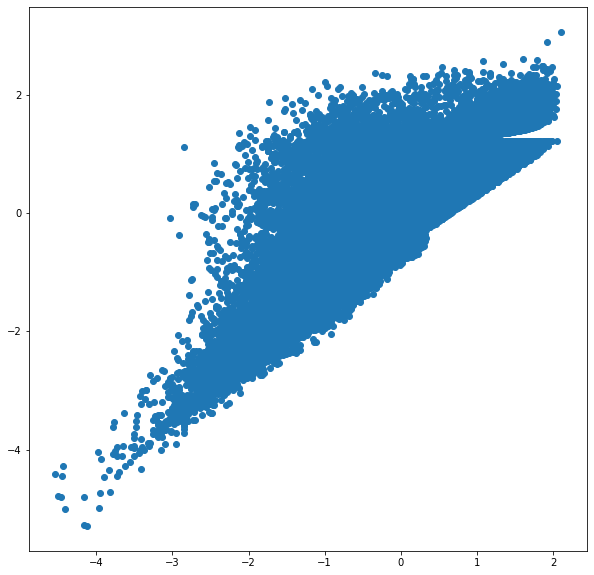

In [80]:
plt.figure(figsize=(10,10))
plt.scatter(weather_std['dewPoint'],weather_std['apparentTemperature']);

In [146]:
pca_weather = PCA()
pca_weather.fit(weather_std) #after runing this it save to the class pca_weather that why the below can run

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [171]:
eig_vals

array([2.99420587, 2.28141482, 1.44461308, 1.09745791, 0.92806086,
       0.40170142, 0.01416684, 0.00480718, 0.6720404 , 0.56659871,
       0.5951327 ])

In [175]:
pca_weather.explained_variance_ #same as eig_vals

array([2.99420587, 2.28141482, 1.44461308, 1.09745791, 0.92806086,
       0.6720404 , 0.5951327 , 0.56659871, 0.40170142, 0.01416684,
       0.00480718])

In [91]:
pca_weather.explained_variance_ratio_

array([0.27219559, 0.20739758, 0.13132608, 0.09976709, 0.08436764,
       0.06109347, 0.05410199, 0.05150804, 0.03651765, 0.00128787,
       0.00043701])

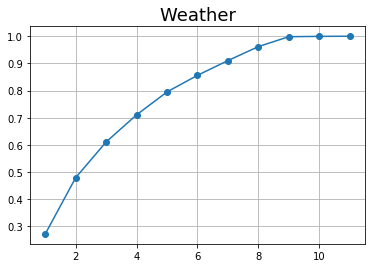

In [96]:
weth = np.cumsum(pca_weather.explained_variance_/np.sum(pca_weather.explained_variance_))

# Plots the elbow plot for the wine pca
plt.plot(range(1,12), weth, marker='o')
plt.grid()
plt.title("Weather", fontsize=18);

In [148]:
pca_weath = PCA(n_components= 2)
z=pca_weath.fit_transform(weather_std)
z[:,1]

array([-0.79597564, -0.65286979,  2.18826956, ..., -0.66980187,
       -1.44226745, -0.49391476])

In [170]:
print(pca_weath.components_,'\n')
print(pca_weath.explained_variance_ratio_)

numerical=weather.columns.to_list()

[[ 0.09030329  0.11277847 -0.31262443  0.05788122 -0.05611     0.00351347
  -0.05823076  0.01994409  0.52189713  0.54679899  0.54747333]
 [ 0.3530928   0.46850182 -0.02917408  0.43688673 -0.0863741   0.04022228
  -0.44998172  0.43142671  0.06514379 -0.17844985 -0.17415926]] 

[0.27219559 0.20739758]


In [168]:
color=cm.rainbow(np.linspace(0, 1, len(pca_weath.components_[0])))
color[i]

array([1.0000000e+00, 1.2246468e-16, 6.1232340e-17, 1.0000000e+00])

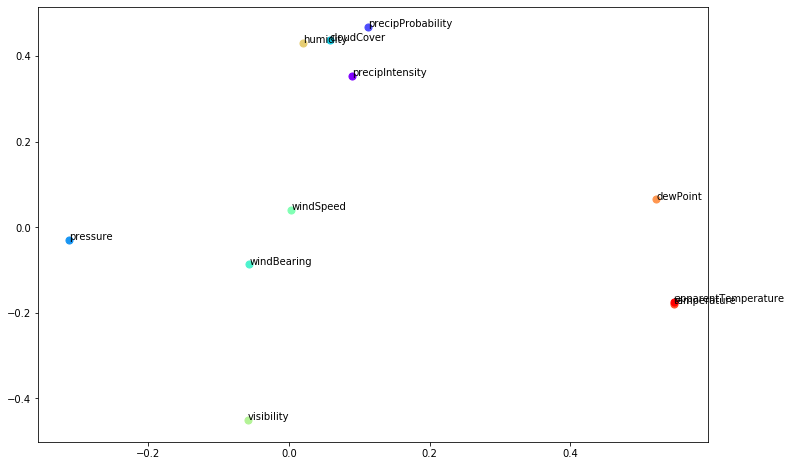

In [165]:
# plt.figure(figsize=(10,10))
# plt.scatter(pca_weath.components_[0],pca_weath.components_[1]);

ig, ax = plt.subplots(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, len(pca_weath.components_[0])))
for i in range(len(pca_weath.components_[0])):
    ax.scatter(pca_weath.components_[0][i],pca_weath.components_[1][i], color = colors[i], label = numerical[i], s = 50)
for i, txt in enumerate(numerical):
    ax.annotate(txt, (pca_weath.components_[0][i], pca_weath.components_[1][i]))

In [139]:
# from sklearn.preprocessing import LabelEncoder
# X = df.drop(['class label'], axis=1).values
y=ufo['ast_is_dangerous'].values

# creating dummy variables
enc = LabelEncoder()
label_encoder = enc.fit(y)

y = label_encoder.transform(y)+1
set(y)
# label_dict = {1: 'True', 2: 'False', 3:'Nan'}

{1, 2, 3}

In [ ]:
data = [go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers',
)]
# create the layout 
layout = go.Layout(
    title = 'Random Data Scatterplot', # Graph title
    xaxis = dict(title = 'Some random x-values'), # x-axis label
    yaxis = dict(title = 'Some random y-values'), # y-axis label
    hovermode ='closest' # handles multiple points landing on the same vertical
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()